# Classificação de células a partir de exames de mama

Este notebook utiliza o conjunto de dados load_breast_cancer() da biblioteca sklearn, que contém informações sobre características de células extraídas de imagens digitalizadas de exames de mama. O objetivo é classificar os tumores como malignos ou benignos com base nesses dados.

In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importa o conjunto de dados
cancer = load_breast_cancer()

# Variáveis e o alvo (benigno ou maligno)
X = cancer.data
y = cancer.target

# 1 - Análise exploratória

In [37]:
# Converte para DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['target'] = df['target'].map({0: 'Maligno', 1: 'Benigno'})

In [38]:
df.shape

(569, 31)

In [39]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Maligno


In [35]:
df.dtypes

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


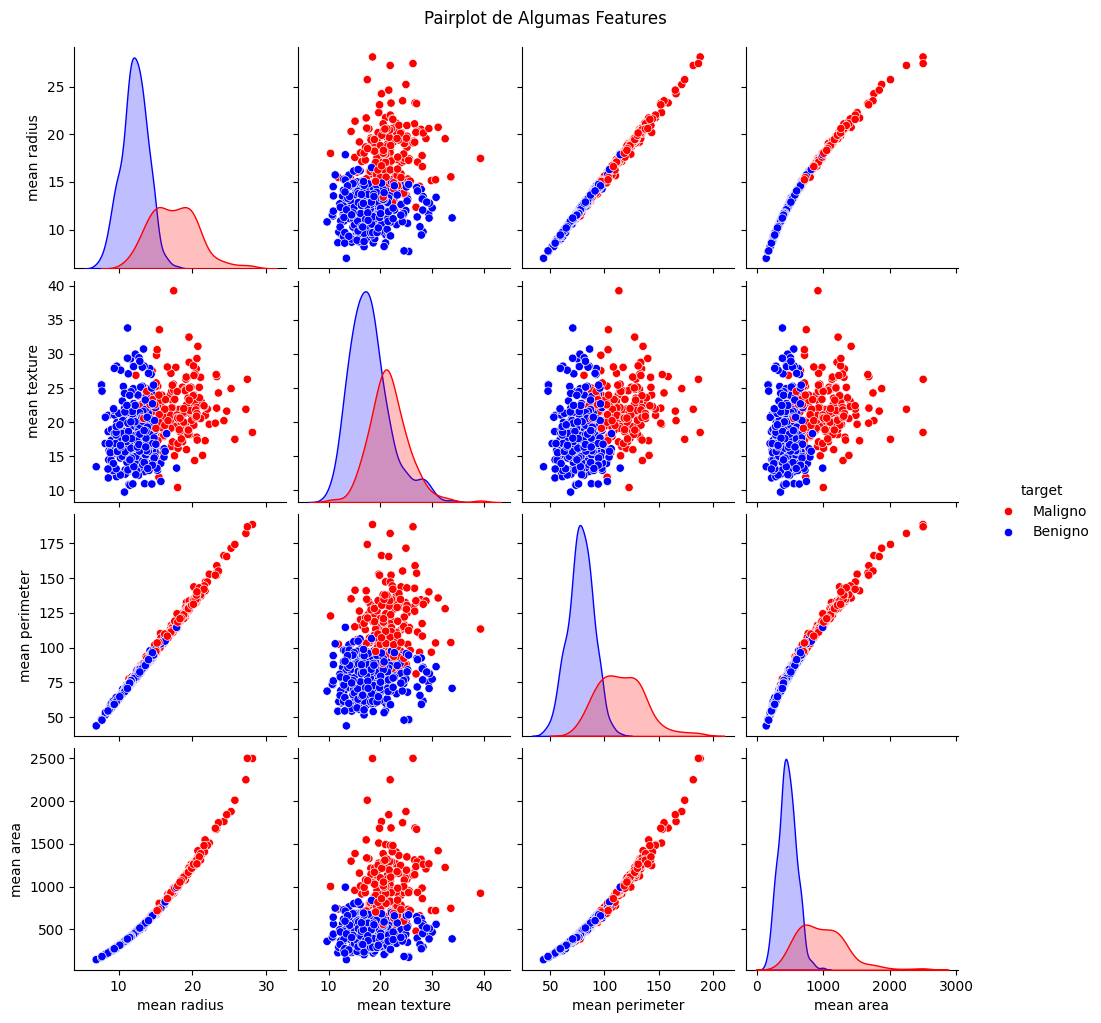

In [31]:
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

sns.pairplot(df[features_to_plot + ['target']], hue='target', palette={'Maligno':'red', 'Benigno':'blue'})
plt.suptitle("Pairplot de Algumas Features", y=1.02)
plt.show()

# 2 - Pré-processamento

Transformação

In [10]:
# Divisão de dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalização por Z-score
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3 - Treinamento

Regressão logística

In [11]:
# Treina o modelo com o conjunto de treino
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Preve os valores do alvo
y_pred = clf.predict(X_test)

Árvore de decisão

In [14]:
arvore = DecisionTreeClassifier(random_state=42)
arvore.fit(X_train, y_train)

y_pred2 = arvore.predict(X_test)

KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred3 = knn.predict(X_test)

# 4 - Avaliação

Regressão logística

In [17]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {'{:.2f}'.format(accuracy)}")

Acurácia: 0.98


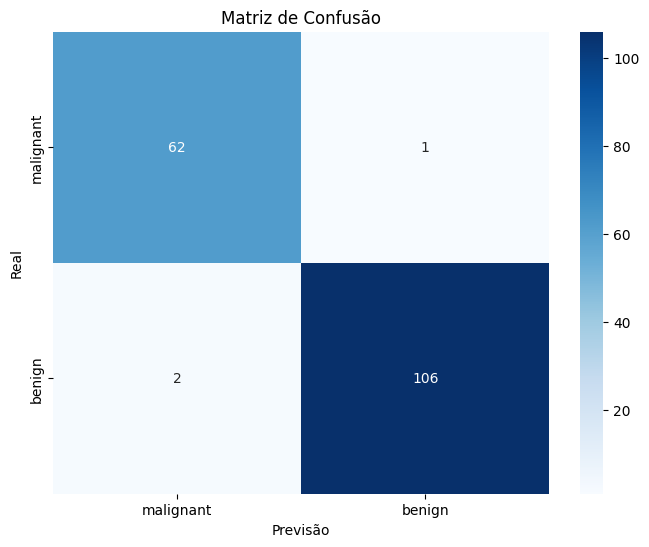

In [18]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Árvore de decisão

In [20]:
accuracy = accuracy_score(y_test, y_pred2)
print(f"Acurácia: {'{:.2f}'.format(accuracy)}")

Acurácia: 0.94


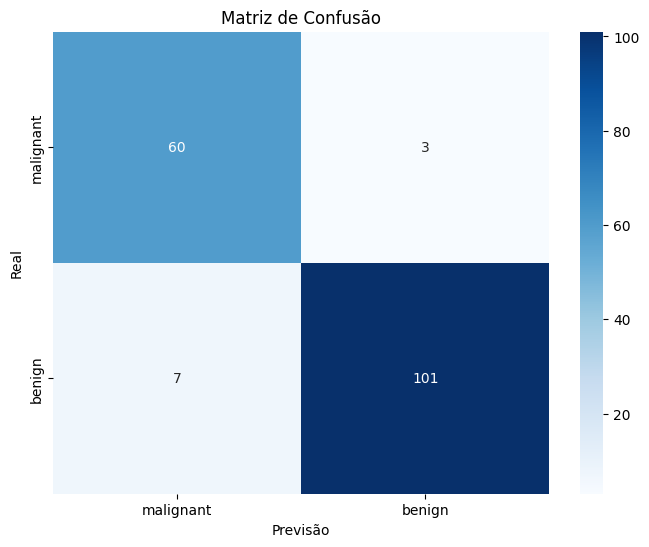

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

KNN

In [29]:
accuracy = accuracy_score(y_test, y_pred3)
print(f"Acurácia: {'{:.2f}'.format(accuracy)}")

Acurácia: 0.97


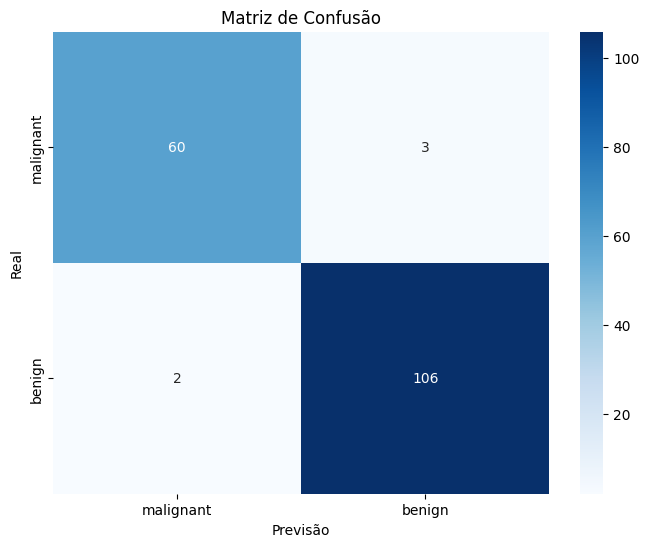

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()